# Phase Plane Portrait

A system of two ODEs

$$ \frac{dx}{dt} = P(x, y), \frac{dy}{dt} = Q(x, y) $$

can be converted to:

$$ \frac{dy}{dx} = \frac{Q(x, y)}{P(x, y)} $$

This ratio is a phase plane trajectory. Let's do a example with simple harmonic oscillator:

$$ \frac{d^2x(t)}{dt^2} + 2 \beta \frac{dx(t)}{dt} + x(t) = 0 $$

Let's convert it to a system of two equations:

$$ \frac{dx(t)}{dt} = v(t), \frac{dv(t)}{dt} = -2 \beta v(t) - x(t) $$

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
t, beta = sp.symbols('t beta')
x = sp.Function('x')(t)
x

x(t)

In [3]:
differential_equation = sp.Eq(x.diff(t, 2) + 2*beta * x.diff(t) + x, 0)
differential_equation

Eq(2*beta*Derivative(x(t), t) + x(t) + Derivative(x(t), (t, 2)), 0)

In [4]:
beta_val = sp.Rational(1, 4)
diff_eq = differential_equation.subs(beta, beta_val)
diff_eq

Eq(x(t) + Derivative(x(t), t)/2 + Derivative(x(t), (t, 2)), 0)

In [5]:
ics = {x.subs(t, 0): 0, x.diff(t).subs(t, 0): 4}
sol = sp.dsolve(diff_eq, x, ics=ics)
sol

Eq(x(t), 16*sqrt(15)*exp(-t/4)*sin(sqrt(15)*t/4)/15)

In [6]:
quality = 200
start, stop = 0, 15
x_values = np.linspace(start, stop, quality)
y_values = evaluate_function(sol.rhs, t, x_values)

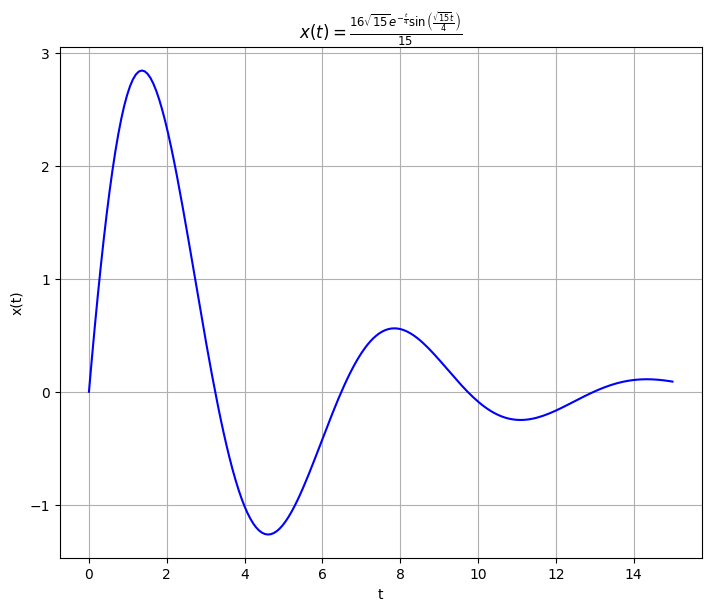

In [7]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(x_values, y_values, color='blue')
axes.set(xlabel='t', ylabel='x(t)', title=f'${sp.latex(sol)}$')
axes.grid(True)

# Vortex Point

Let's introduce a new variable $v(t) = \frac{dx(t)}{dt}$

In [8]:
v = sp.Function('v')(t)
v

v(t)

In [9]:
diff_eq1 = sp.Eq(x.diff(t), v)
diff_eq1

Eq(Derivative(x(t), t), v(t))

In [10]:
diff_eq2 = sp.Eq(v.diff(t), sp.solve(differential_equation, x.diff(t, 2))[0].subs(x.diff(t), v))
diff_eq2

Eq(Derivative(v(t), t), -2*beta*v(t) - x(t))

Let's compute phase portrait for $\beta = 0$

In [11]:
# values for phase plane
beta_val = 0
diff_eq_dx = diff_eq1.subs(beta, beta_val)
diff_eq_dv = diff_eq2.subs(beta, beta_val)

In [12]:
a, b = -5, 5
x_step, v_step = .5, .5
parameters = (a, b, x_step, a, b, v_step)

In [13]:
# values for phase trajectory
diff_eq = differential_equation.subs(beta, beta_val)
x_0, v_0 = 0, 4
ics = {x.subs(t, 0): x_0, x.diff(t).subs(t, 0): v_0}
sol = sp.dsolve(diff_eq, x, ics=ics)
sol

Eq(x(t), 4*sin(t))

In [14]:
t_a, t_b = 0, 2 * np.pi
quality = 200
t_values, x_trajectory, v_trajectory = phase_trajectory(sol, t, (t_a, t_b, quality))
x_values = evaluate_function(sol.rhs, t, t_values)

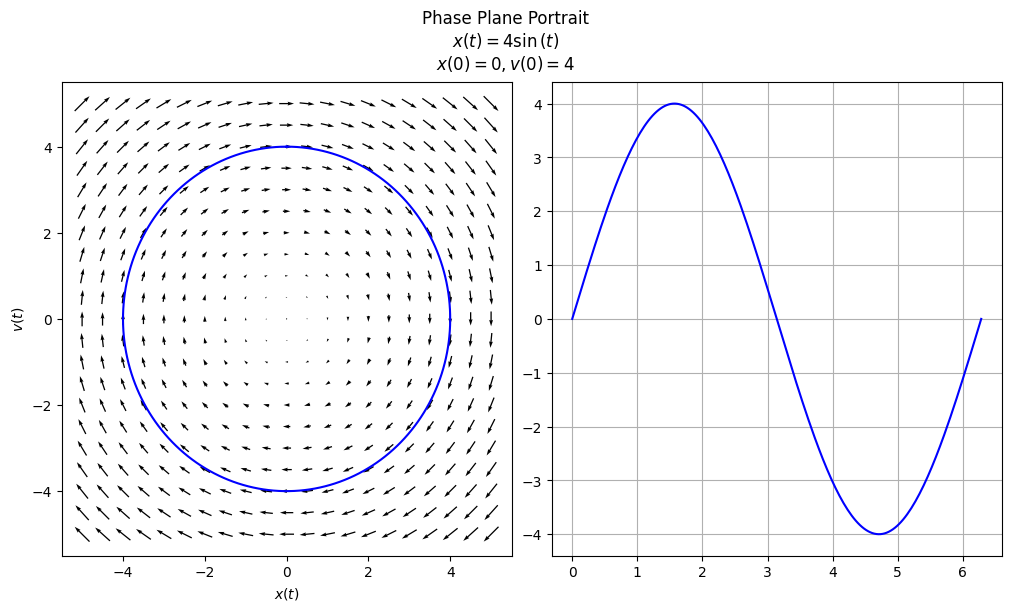

In [17]:
figure, axes = plt.subplots(1, 2, layout='constrained', figsize=(10, 6))
phase_portrait([diff_eq_dx, diff_eq_dv], [x, v], parameters, axes[0], normalize=False)
axes[0].plot(x_trajectory, v_trajectory, color='blue')
axes[1].plot(t_values, x_values, color='blue')
axes[1].grid()
_=figure.suptitle(f'Phase Plane Portrait\n${sp.latex(sol)}$\n$x(0) = {x_0}, v(0) = {v_0}$')